# FIFA Exploratory Data Analysis

The goal of this notebook is to answer the following question:
- What attributes affect if a player has a "high salary", "average salary", or "low salary"? 

Our data is from: https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/STATS402/'

Mounted at /content/drive


In [2]:
df = pd.read_csv(drive_dir + 'players_21.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


It would be interesting to see how 
- `age`
- `nationality`
- `league_name`
- `league_rank`
- `overall`
- `potential`
- `player_positions`
- `international_reputation` 

affect a player's wage.

## Basic Initial Exploration

In [3]:
df.shape

(18944, 106)

In [4]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

club_name: 225 (1.19%) missing values
league_name: 225 (1.19%) missing values
league_rank: 225 (1.19%) missing values
release_clause_eur: 995 (5.25%) missing values
player_tags: 17536 (92.57%) missing values
team_position: 225 (1.19%) missing values
team_jersey_number: 225 (1.19%) missing values
loaned_from: 18186 (96.00%) missing values
joined: 983 (5.19%) missing values
contract_valid_until: 225 (1.19%) missing values
nation_position: 17817 (94.05%) missing values
nation_jersey_number: 17817 (94.05%) missing values
pace: 2083 (11.00%) missing values
shooting: 2083 (11.00%) missing values
passing: 2083 (11.00%) missing values
dribbling: 2083 (11.00%) missing values
defending: 2083 (11.00%) missing values
physic: 2083 (11.00%) missing values
gk_diving: 16861 (89.00%) missing values
gk_handling: 16861 (89.00%) missing values
gk_kicking: 16861 (89.00%) missing values
gk_reflexes: 16861 (89.00%) missing values
gk_speed: 16861 (89.00%) missing values
gk_positioning: 16861 (89.00%) missing 

In [5]:
df = df.drop(['player_tags', 'loaned_from', 'nation_position', 'defending_marking', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'release_clause_eur', 'joined'], axis='columns')

In [6]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

club_name: 225 (1.19%) missing values
league_name: 225 (1.19%) missing values
league_rank: 225 (1.19%) missing values
team_position: 225 (1.19%) missing values
team_jersey_number: 225 (1.19%) missing values
contract_valid_until: 225 (1.19%) missing values
pace: 2083 (11.00%) missing values
shooting: 2083 (11.00%) missing values
passing: 2083 (11.00%) missing values
dribbling: 2083 (11.00%) missing values
defending: 2083 (11.00%) missing values
physic: 2083 (11.00%) missing values


In [7]:
df = df.dropna(subset=['league_name'])

In [8]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

pace: 2053 (10.97%) missing values
shooting: 2053 (10.97%) missing values
passing: 2053 (10.97%) missing values
dribbling: 2053 (10.97%) missing values
defending: 2053 (10.97%) missing values
physic: 2053 (10.97%) missing values


In [9]:
df = df.dropna()

In [10]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

In [11]:
df.shape

(16666, 92)

## Feature Engineering of the Target Variable using `wage_eur`

Text(0.5, 1.0, 'Histogram of wage_eur')

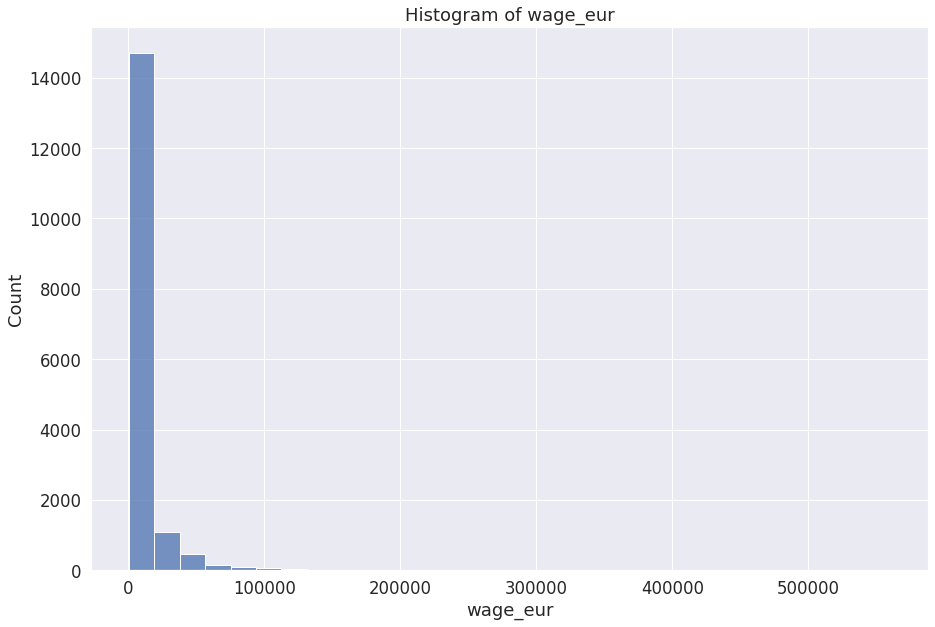

In [12]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='wage_eur', bins=30)
hist.set_title('Histogram of wage_eur')

In [13]:
df['wage_eur_log'] = np.log(df['wage_eur']).replace(-np.inf, 0)

Text(0.5, 1.0, 'Histogram of log of wage_eur')

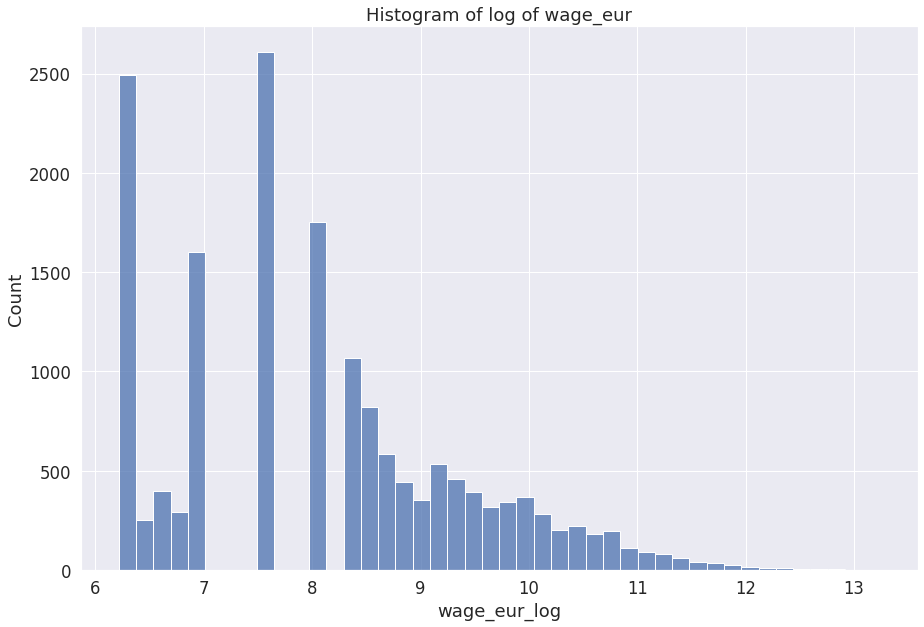

In [14]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='wage_eur_log')
hist.set_title('Histogram of log of wage_eur')

In [15]:
df['wage_eur_log'].describe(percentiles=[0, 1/3, 2/3, 1])

count    16666.000000
mean         8.079649
std          1.367664
min          6.214608
0%           6.214608
33.3%        7.600902
50%          8.006368
66.7%        8.517193
100%        13.235692
max         13.235692
Name: wage_eur_log, dtype: float64

In [16]:
df['wage_cat'] = pd.cut(df.wage_eur_log,bins=[-1,7.600902,8.517193,15],labels=['low salary', 'average salary', 'high salary'])

In [17]:
df['wage_cat'].value_counts()

high salary       6196
average salary    5432
low salary        5038
Name: wage_cat, dtype: int64

## Feature Engineering of `league_name_grouped`

In [18]:
df.loc[df['league_name'] == 'English Premier League', 'league_name_grouped'] = 'English Premier League'
df.loc[df['league_name'] == 'French Ligue 1', 'league_name_grouped'] = 'F/G/I/S'
df.loc[df['league_name'] == 'German 1. Bundesliga', 'league_name_grouped'] = 'F/G/I/S'
df.loc[df['league_name'] == 'Italian Serie A', 'league_name_grouped'] = 'F/G/I/S'
df.loc[df['league_name'] == 'Spain Primera Division', 'league_name_grouped'] = 'F/G/I/S'

In [19]:
df['league_name_grouped'] = df['league_name_grouped'].fillna('Other') 

In [20]:
df['league_name_grouped'].value_counts()

Other                     13908
F/G/I/S                    2170
English Premier League      588
Name: league_name_grouped, dtype: int64

In [21]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

In [22]:
df.to_csv(drive_dir + 'clean_data.csv', index=False)

# EDA

It would be interesting to see how 
- `age`
- `nationality`
- `league_name`
- `league_rank`
- `overall`
- `potential`
- `player_positions`
- `international_reputation` 

affect a player's salary.

## Exploring Age

In [23]:
df['age'].describe()

count    16666.000000
mean        25.052622
std          4.557404
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         53.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Histogram of age')

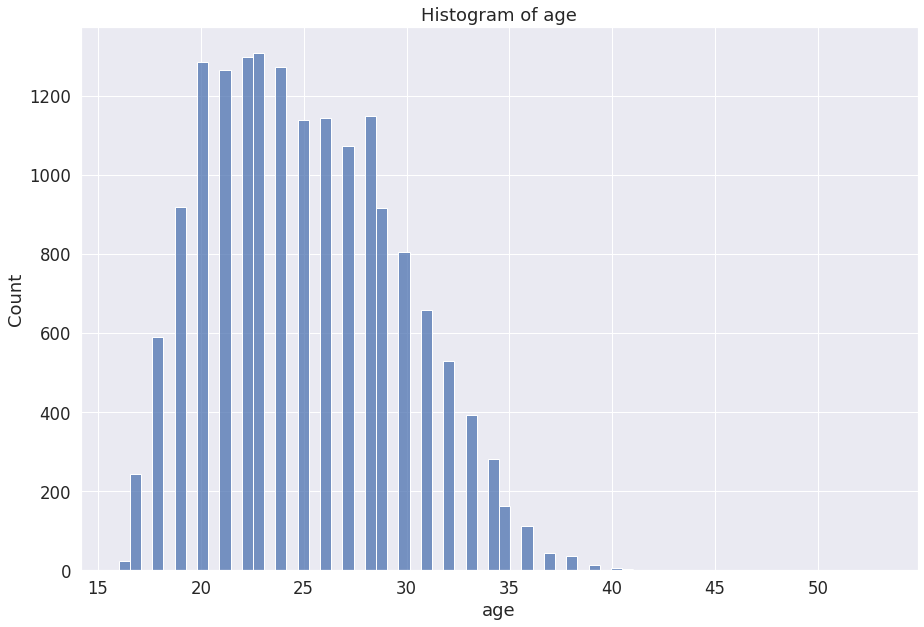

In [24]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='age')
hist.set_title('Histogram of age')

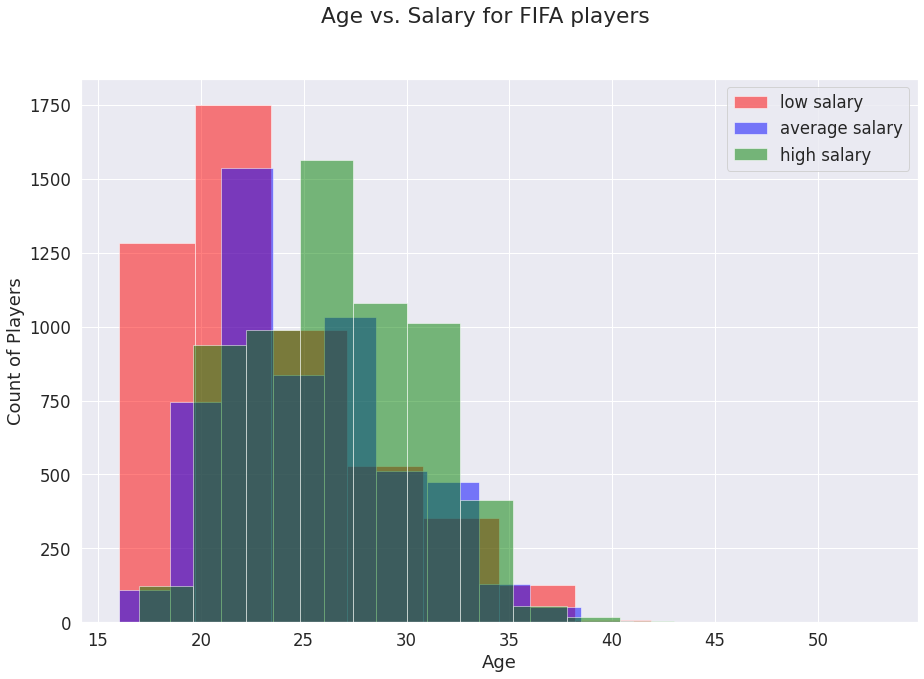

In [25]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['age'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['age'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['age'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Players')
fig.suptitle('Age vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Age for Different Salaries')

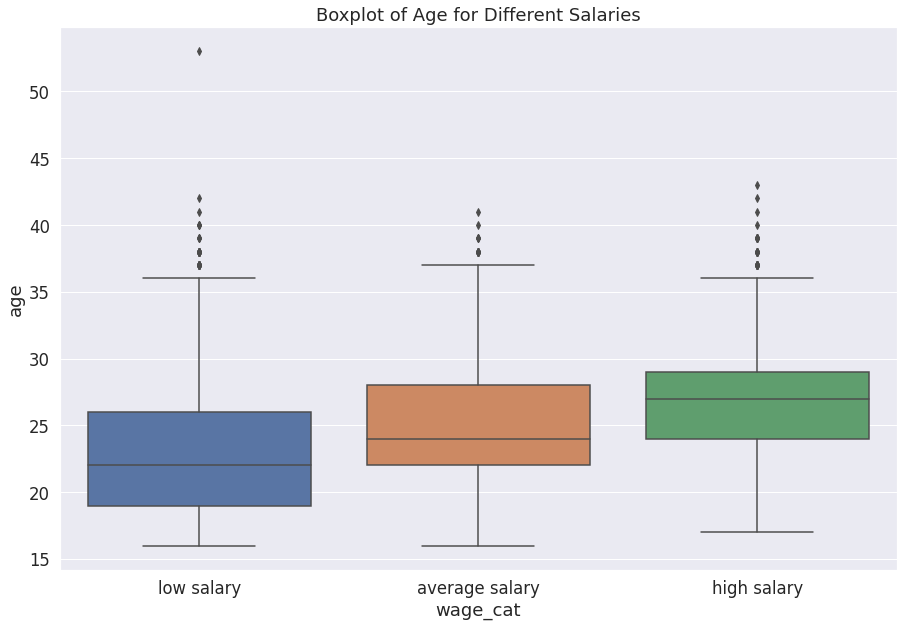

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'age')
boxplt.set_title("Boxplot of Age for Different Salaries")

## Exploring Top 5 Nationalities

In [27]:
df['nationality'].value_counts()

England      1510
Germany      1026
Spain         943
France        886
Argentina     837
             ... 
Nicaragua       1
Rwanda          1
Andorra         1
Indonesia       1
Guam            1
Name: nationality, Length: 161, dtype: int64

In [28]:
data_crosstab = pd.crosstab(df['nationality'], df['wage_cat'], margins = False)
print(data_crosstab)

wage_cat     low salary  average salary  high salary
nationality                                         
Afghanistan           1               1            0
Albania              16              17           14
Algeria               4               9           33
Andorra               1               0            0
Angola                3               4            8
...                 ...             ...          ...
Uzbekistan            4               2            1
Venezuela           138              16           19
Wales                17              58           35
Zambia                4               3            4
Zimbabwe              4               2            5

[161 rows x 3 columns]


Text(0.5, 0.98, 'Nationality vs. Salary for FIFA players')

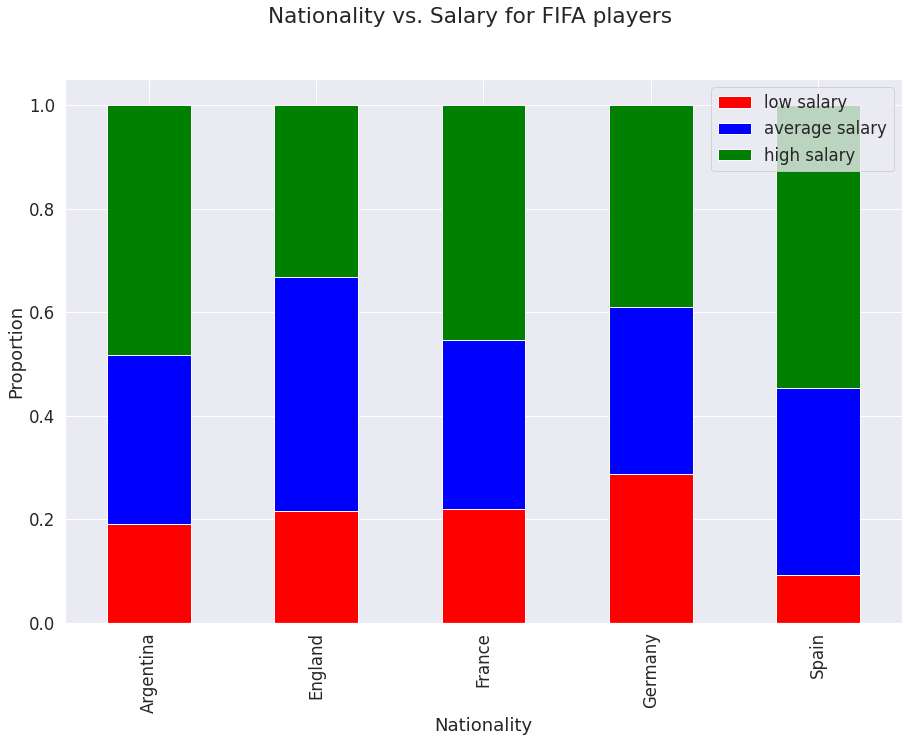

In [29]:
counts_df = df[(df['nationality']=='England') | (df['nationality']=='Germany') | (df['nationality']=='Spain') | (df['nationality']=='France') | (df['nationality']=='Argentina')]
counts_df_2 = counts_df.groupby(['nationality', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('Nationality')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('Nationality vs. Salary for FIFA players')

## Exploring Leagues

In [30]:
df['league_name_grouped'].value_counts()

Other                     13908
F/G/I/S                    2170
English Premier League      588
Name: league_name_grouped, dtype: int64

In [31]:
data_crosstab = pd.crosstab(df['league_name_grouped'], df['wage_cat'], margins = False)
print(data_crosstab)

wage_cat                low salary  average salary  high salary
league_name_grouped                                            
English Premier League           5              38          545
F/G/I/S                         49             312         1809
Other                         4984            5082         3842


Text(0.5, 0.98, 'League vs. Salary for FIFA players')

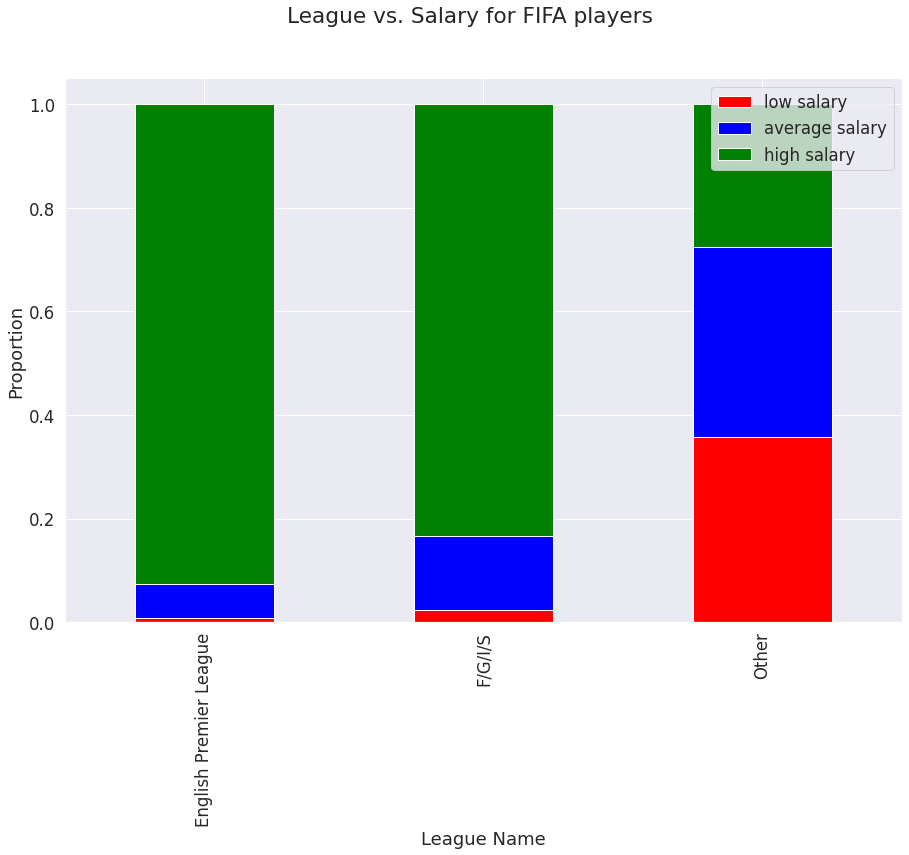

In [32]:
counts_df_2 = df.groupby(['league_name_grouped', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('League Name')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('League vs. Salary for FIFA players')

## Exploring League Rank

In [33]:
df['league_rank'].value_counts()

1.0    12818
2.0     2277
3.0     1025
4.0      546
Name: league_rank, dtype: int64

In [34]:
data_crosstab = pd.crosstab(df['league_rank'], df['wage_cat'], margins = False)
print(data_crosstab)

wage_cat     low salary  average salary  high salary
league_rank                                         
1.0                3899            3685         5234
2.0                 519             866          892
3.0                 500             488           37
4.0                 120             393           33


Text(0.5, 0.98, 'League Rank vs. Salary for FIFA players')

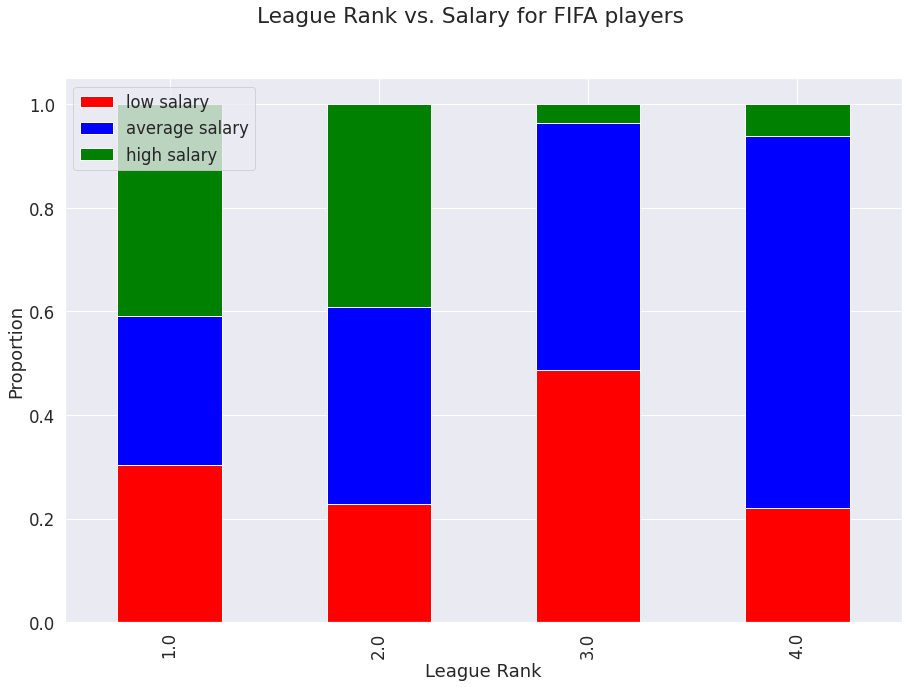

In [35]:
counts_df = df.groupby(['league_rank', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df.T.div(counts_df.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('League Rank')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('League Rank vs. Salary for FIFA players')

Text(0.5, 0.98, 'Salary vs. League Rank for FIFA players')

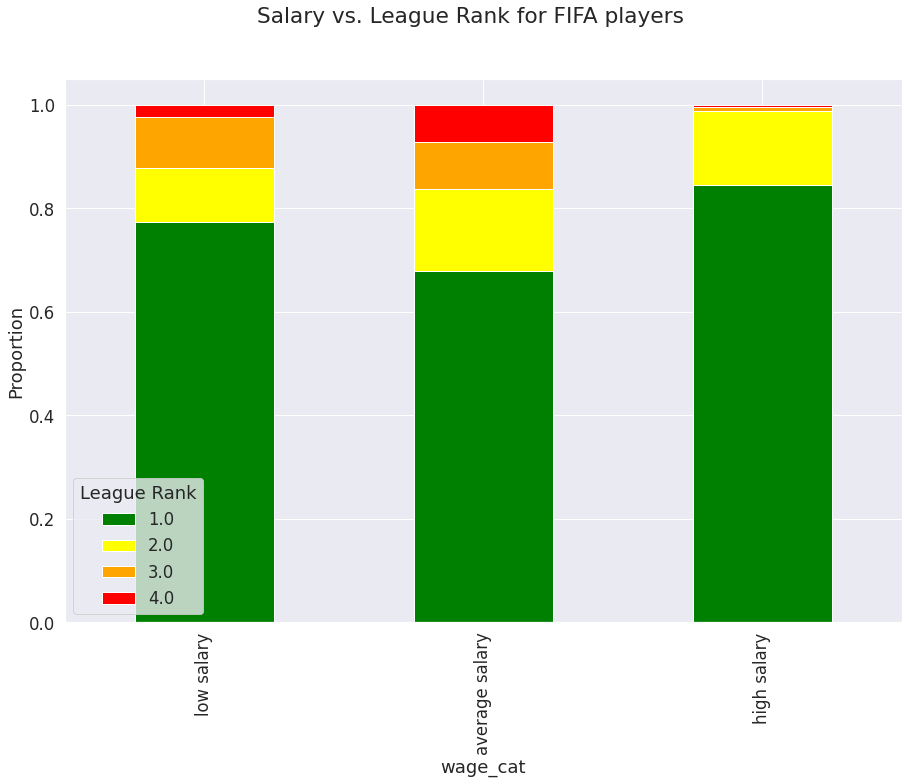

In [36]:
league_rank_df = counts_df.div(counts_df.sum()).T
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
league_rank_df.plot(kind = 'bar', stacked = True, color = ['green', 'yellow', 'orange', 'red'], ax = ax)
ax.legend(title = 'League Rank')
ax.set_ylabel('Proportion')
fig.suptitle('Salary vs. League Rank for FIFA players')

## Exploring Overall

In [ ]:
df['overall'].describe()

count    18719.000000
mean        65.635023
std          7.003908
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: overall, dtype: float64

Text(0.5, 1.0, 'Histogram of overall score')

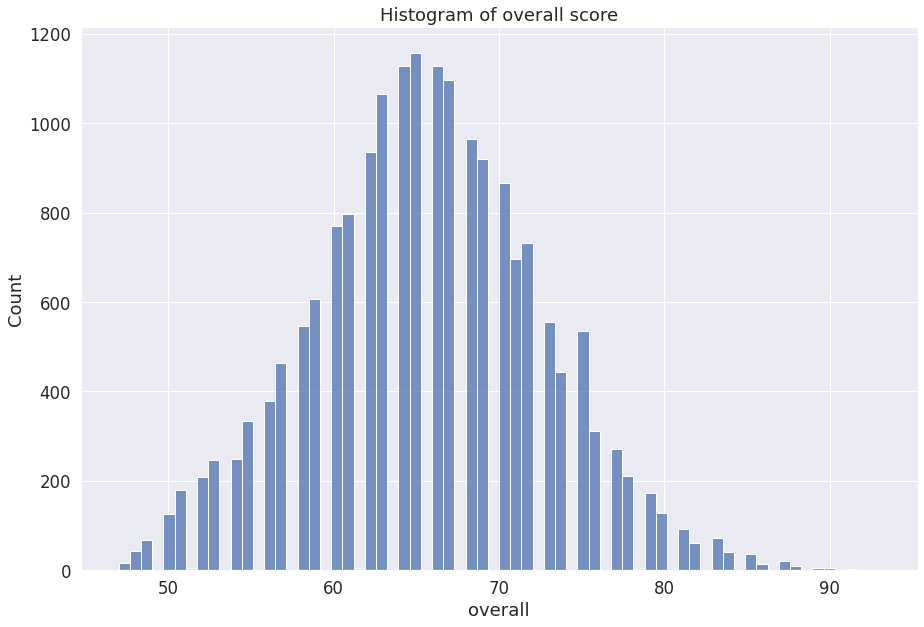

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='overall')
hist.set_title('Histogram of overall score')

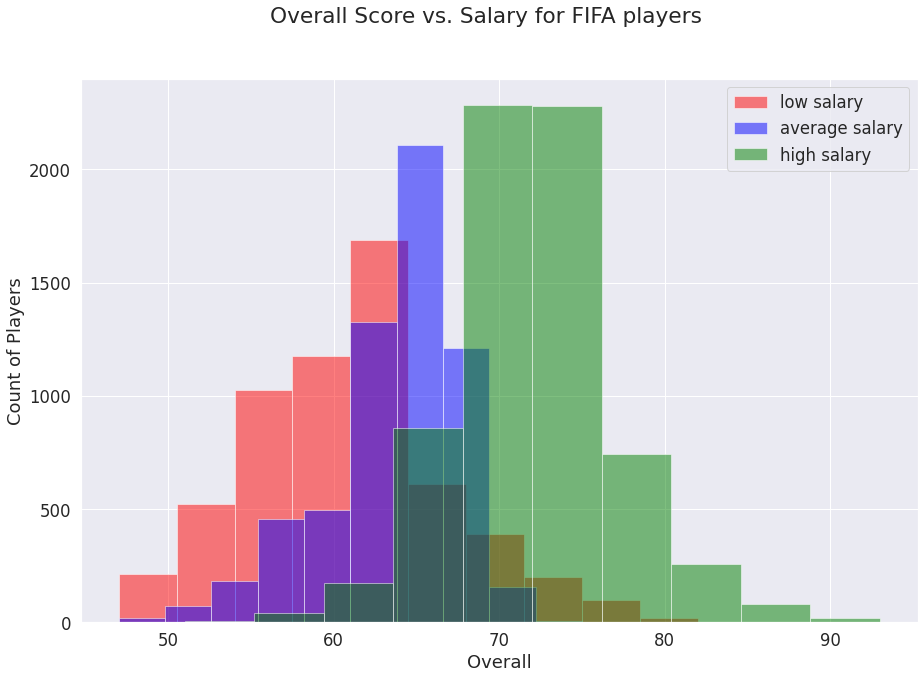

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['overall'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['overall'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['overall'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Overall')
ax.set_ylabel('Count of Players')
fig.suptitle('Overall Score vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Overall Score for Different Salaries')

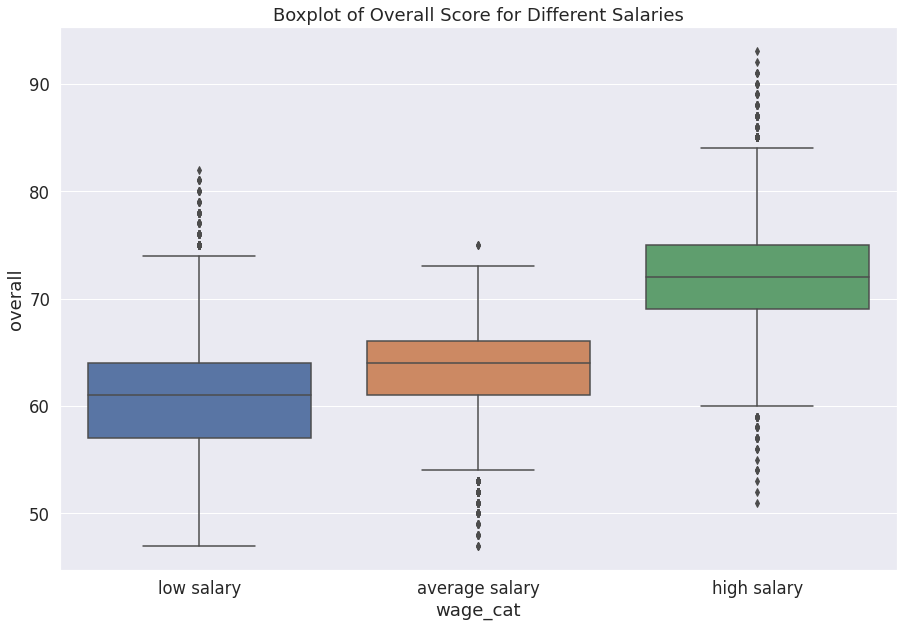

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'overall')
boxplt.set_title("Boxplot of Overall Score for Different Salaries")

## Exploring Potential

In [ ]:
df['potential'].describe()

count    18719.000000
mean        71.089695
std          6.112693
min         47.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: potential, dtype: float64

Text(0.5, 1.0, 'Histogram of potential score')

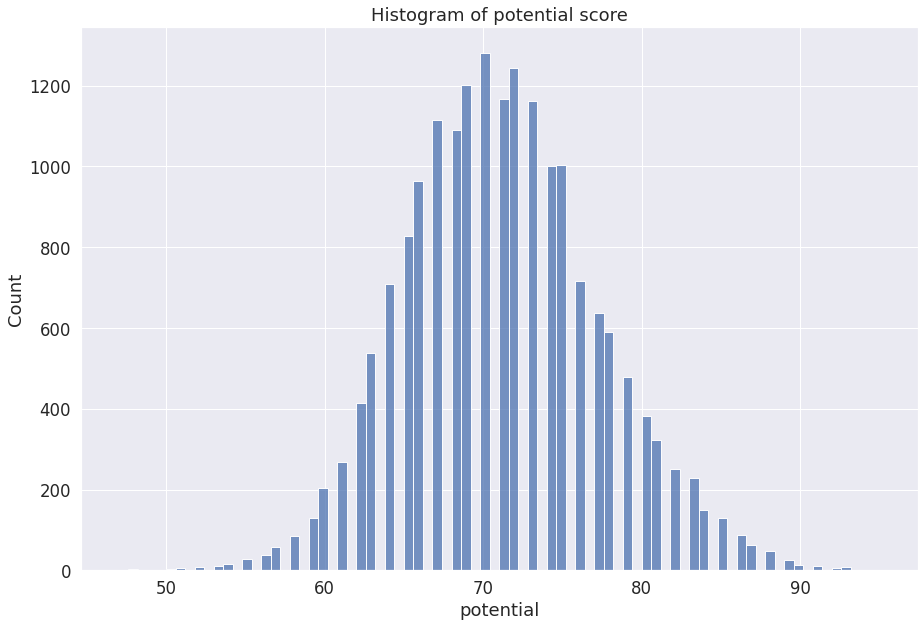

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='potential')
hist.set_title('Histogram of potential score')

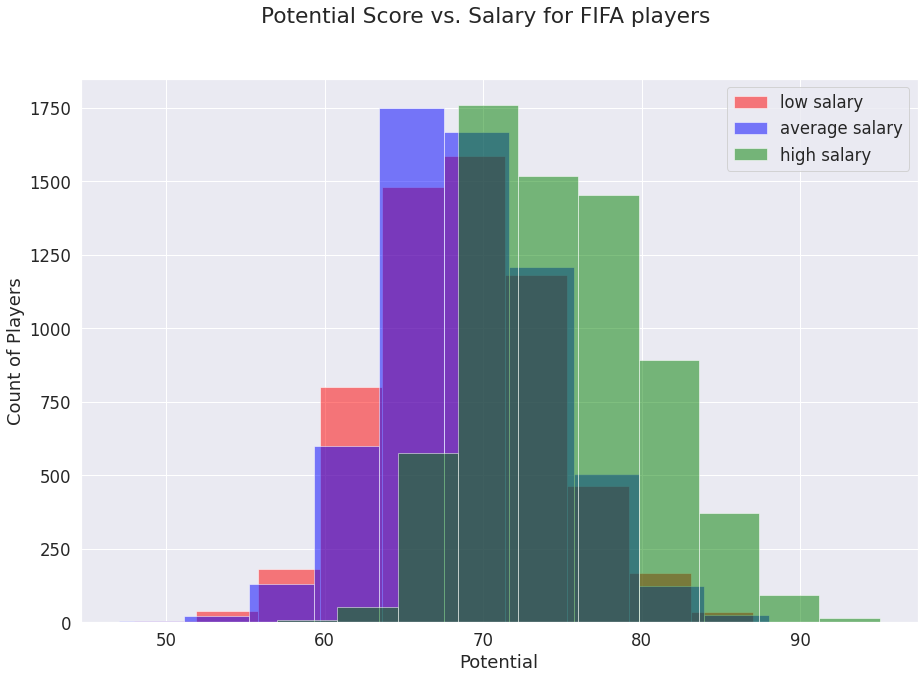

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['potential'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['potential'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['potential'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Potential')
ax.set_ylabel('Count of Players')
fig.suptitle('Potential Score vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Potential Score for Different Salaries')

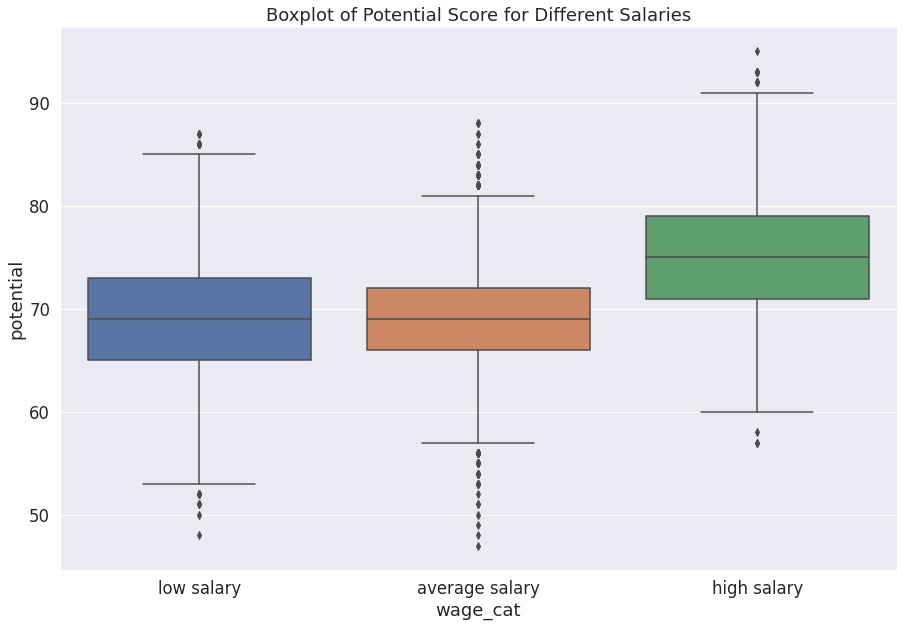

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'potential')
boxplt.set_title("Boxplot of Potential Score for Different Salaries")

## Exploring Top 5 Positions

In [ ]:
df['player_positions'].value_counts()

CB             2408
GK             2053
ST             1875
CDM, CM         811
CM              805
               ... 
CF, LM, CAM       1
CAM, RW, CF       1
CM, CF, CAM       1
LWB, LM, ST       1
CDM, CB, RM       1
Name: player_positions, Length: 610, dtype: int64

- CB: center back
- GK: goalkeeper
- ST: striker
- CDM, CM: central defensive midfielders, center midfielder
- CM: center midfielder

In [ ]:
data_crosstab = pd.crosstab(df['player_positions'], df['wage_cat'], margins = False)
print(data_crosstab)

wage_cat          low salary  average salary  high salary
player_positions                                         
CAM                      127              86           51
CAM, CDM                   7               2            4
CAM, CDM, CM               0               1            3
CAM, CDM, LM               1               0            0
CAM, CF                    7               7            6
...                      ...             ...          ...
ST, RW, CF                 1               0            0
ST, RW, LM                 0               2            0
ST, RW, LW                11              14           18
ST, RW, RM                 1               0            4
ST, RWB                    0               2            0

[610 rows x 3 columns]


Text(0.5, 0.98, 'Position vs. Salary for FIFA players')

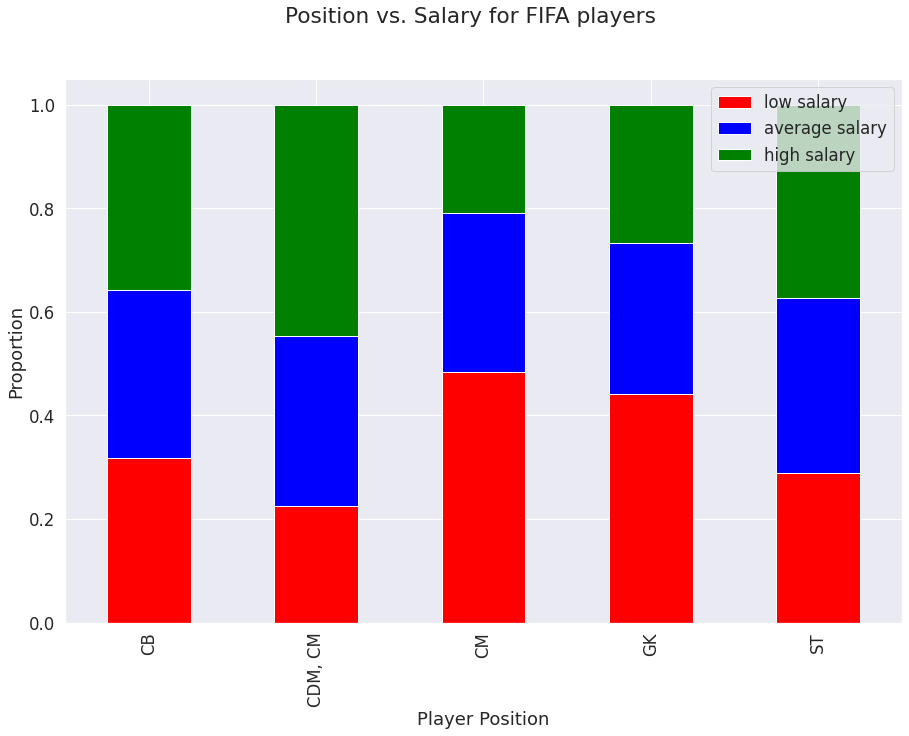

In [ ]:
counts_df = df[(df['player_positions']=='CB') | (df['player_positions']=='GK') | (df['player_positions']=='ST') | (df['player_positions']=='CDM, CM') | (df['player_positions']=='CM')]
counts_df_2 = counts_df.groupby(['player_positions', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('Player Position')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('Position vs. Salary for FIFA players')

## Exploring International Reputation

In [ ]:
df['international_reputation'].value_counts()

1    17386
2     1002
3      282
4       43
5        6
Name: international_reputation, dtype: int64

The higher the international reputation, the better.

In [ ]:
data_crosstab = pd.crosstab(df['international_reputation'], df['wage_cat'], margins = False)
print(data_crosstab)

wage_cat                  low salary  average salary  high salary
international_reputation                                         
1                               5872            5979         5535
2                                 63              52          887
3                                  8               3          271
4                                  0               0           43
5                                  0               0            6


Text(0.5, 0.98, 'International Reputation vs. Salary for FIFA players')

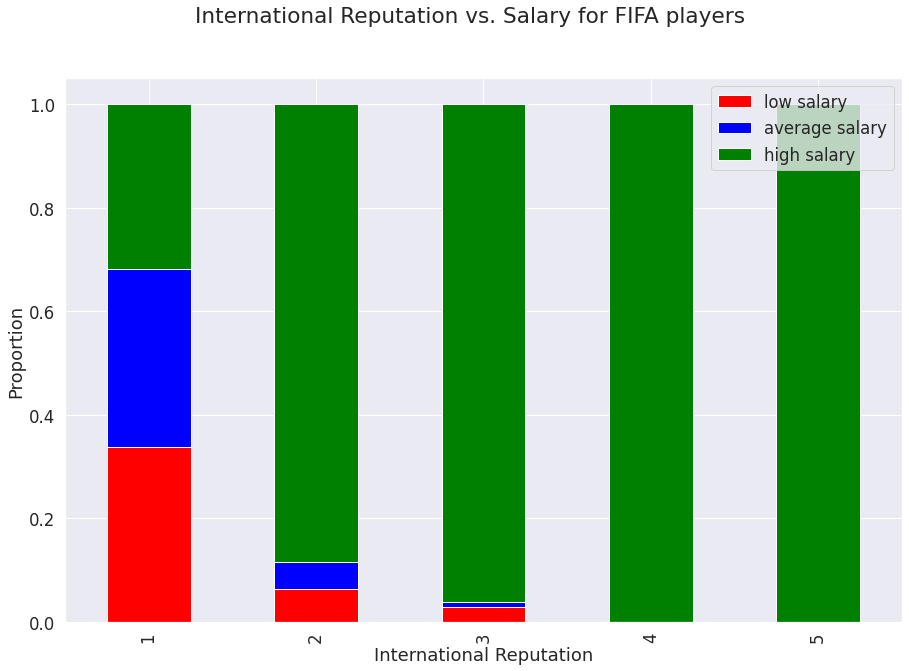

In [ ]:
counts_df = df.groupby(['international_reputation', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df.T.div(counts_df.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('International Reputation')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('International Reputation vs. Salary for FIFA players')

## Exploring Defending Score

In [ ]:
df['defending'].describe()

count    18719.000000
mean        51.267371
std         15.466619
min         15.000000
25%         39.000000
50%         52.000000
75%         63.000000
max         91.000000
Name: defending, dtype: float64

Text(0.5, 1.0, 'Histogram of defending score')

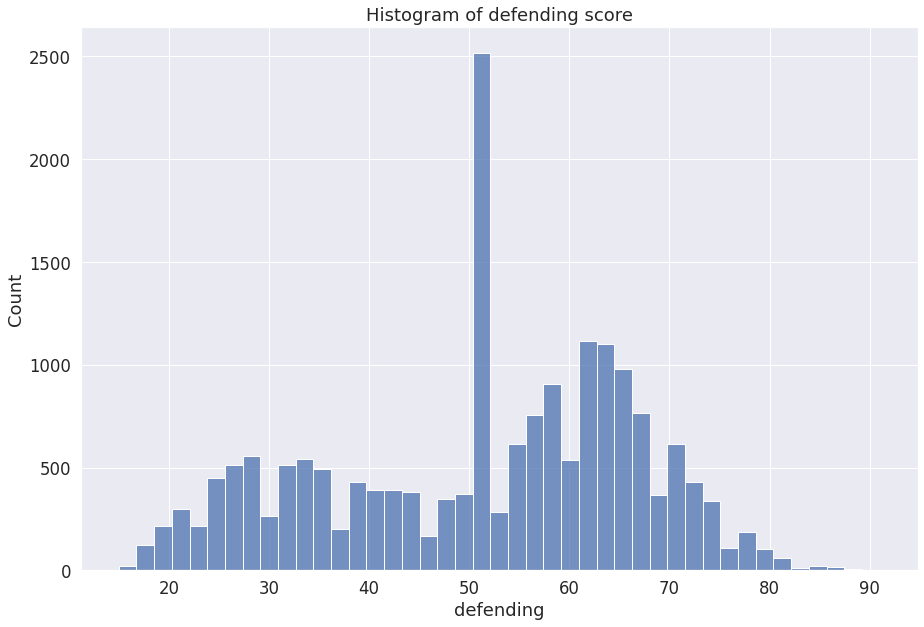

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='defending')
hist.set_title('Histogram of defending score')

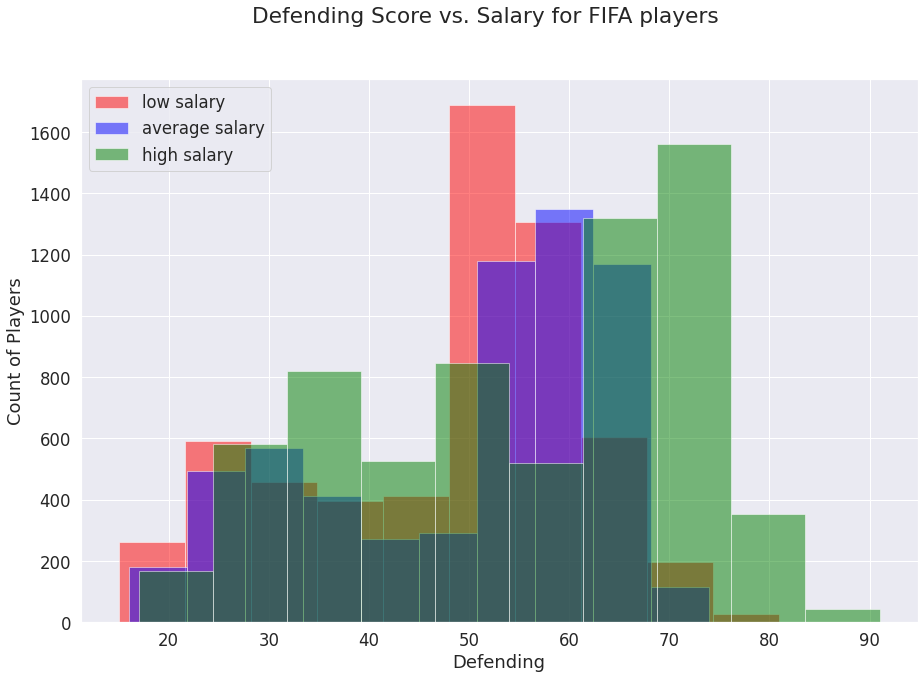

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['defending'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['defending'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['defending'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Defending')
ax.set_ylabel('Count of Players')
fig.suptitle('Defending Score vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Defending Score for Different Salaries')

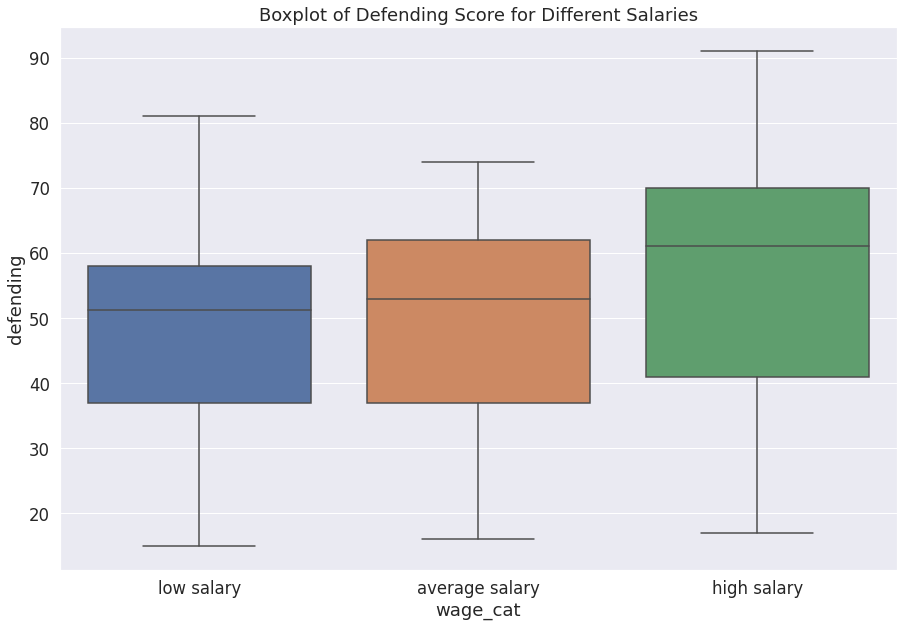

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'defending')
boxplt.set_title("Boxplot of Defending Score for Different Salaries")